Trying to make Chambolle pock to work

In [1]:
%matplotlib inline
from ipywidgets import interactive
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [22]:
import imp
import os
MODULE = 'D:/Git/invprob'
TEST = 'D:/Git/invprob/notebook' # beware the \t ....
def goto(string):
    os.chdir(string)
goto(TEST)

In [72]:
goto(MODULE)
import invprob.optim
_ = imp.reload(invprob.optim)
import invprob.sparse as sparse
_ = imp.reload(invprob.sparse)
import invprob
_ = imp.reload(invprob)

from invprob.optim import fb_lasso, cp_lasso
goto(TEST)

In [4]:
np.random.seed(seed=0)  # Seed for np.random
dpi = 100  # Resolution for plotting (230 for small screen, 100 for large one)
plt.ion()

In [6]:
# We start by defining the characteristics of the problem
data_size = 100
data_number = round(data_size / 2)
sparsity_level = 10

# We define the main components of our problem
Phi = np.random.randn(data_number, data_size)
x0 = np.sign(sparse.randn(data_size, 1, sparsity_level))
y = Phi@x0

In [79]:
# We solve the noisy problem with cp
iter_nb = 2000
x_noisy_cp, details_cp = cp_lasso(Phi, y, iter_nb, verbose=True)

In [80]:
la.norm(x_noisy_cp)

3.1622776601683795

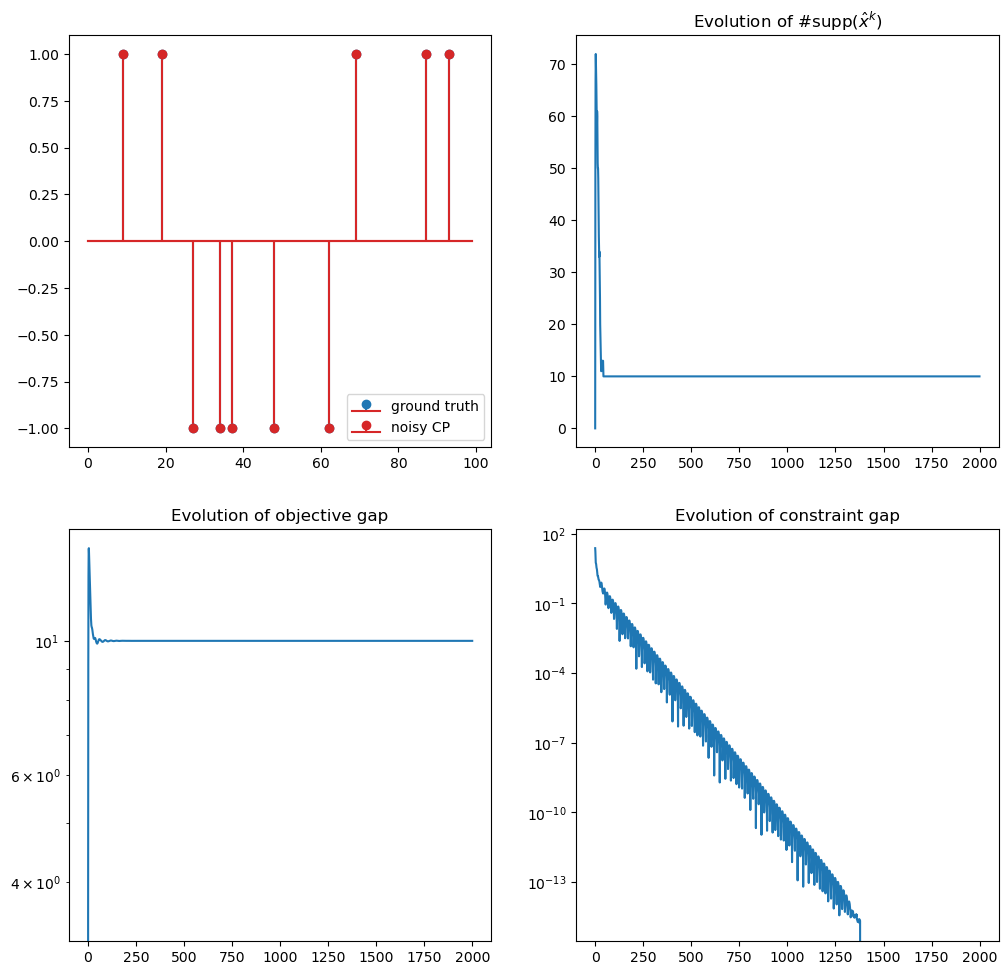

In [81]:
_=plt.figure(dpi=dpi, figsize=(12, 12))

_=plt.subplot(2, 2, 1)
sparse.stem(x0, "C0", "ground truth")
sparse.stem(x_noisy_cp, "C3", "noisy CP")

_=plt.subplot(2, 2, 2)
_=plt.title(r"Evolution of #supp$(\hat{x}^k)$")
_=plt.plot(details_cp.get("iterate_sparsity"))

_=plt.subplot(2, 2, 3)
_=plt.title(r"Evolution of objective gap")
_=plt.plot(details_cp.get("objective_gap"))
plt.yscale('log') 

_=plt.subplot(2, 2, 4)
_=plt.title(r"Evolution of constraint gap")
_=plt.plot(details_cp.get("constraint_gap"))
plt.yscale('log') 

_=plt.show()

In [82]:
# chambolle pock
x = 0*x0
x_extrap = x
u = Phi@x
stepsize = 1 / la.norm(Phi, 2)
for k in range(100):
    u = u + stepsize*((Phi@x_extrap) - y)
    x_old = x
    x = sparse.soft_thresholding( x - stepsize*Phi.T@u , stepsize)
    x_extrap = 2*x - 1*x_old
la.norm(x)

3.1591104044519858

In [83]:
# condat
x = 0*x0
u = Phi@x
stepsize = 1 / la.norm(Phi, 2)
for k in range(100):
    x_old = x
    x = sparse.soft_thresholding( x - stepsize*Phi.T@u , stepsize)
    x_extrap = 2*x - 1*x_old
    u = u + stepsize*((Phi@x_extrap) - y)
la.norm(x)

3.160457393471416

it works